In [1]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Import All needed Data from Data folder

#code stopped running whenn comupter shut off, so combine both data sets here
data1 = pd.read_csv("../uwi/data/masterdata296.csv")
data2 = pd.read_csv("../uwi/data/masterdata296to428.csv")

reps_short_list = pd.read_csv("../uwi/data/reps_short_list.csv")
census_data = pd.read_csv("../uwi/data/censusData20181217.csv")
state_data = pd.read_csv("../uwi/data/statedata.csv")
district_data = pd.read_csv("../uwi/data/districtdata.csv")
vote_data_all = data1.append(data2)
vote_data_all.to_csv("../uwi/data/vote_data_all.csv")

In [7]:
#Clean up vote data
vote_data = vote_data_all.dropna()
vote_data.reset_index()
vote_data.head()

,Unnamed: 0,member_id,description,position,question,result,date,congress
0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115
1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115
3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115
4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115
5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115


In [15]:
#Create columns related to text of bill description, by represenatative
vote_data['lowerdesc'] = vote_data['description'].str.lower()
vote_data['anydrug'] = vote_data['lowerdesc'].str.contains("opioid|substance abuse|drug|addiction")
vote_data['opioid'] = vote_data['lowerdesc'].str.contains("opioid")
vote_data['drug'] = vote_data['lowerdesc'].str.contains("drug")
vote_data['tax'] = vote_data['lowerdesc'].str.contains("tax")
vote_data['education'] = vote_data['lowerdesc'].str.contains("education|college")
vote_data['jobs'] = vote_data['lowerdesc'].str.contains("jobs|job")
vote_data['Yes'] = np.where(vote_data['position']=='Yes', 1, 0)
vote_data['No'] = np.where(vote_data['position']=='No', 1, 0)

vote_data.head()

/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Unnamed: 0,member_id,description,position,question,result,date,congress,lowerdesc,anydrug,opioid,drug,tax,education,jobs,Yes,No
0,0,A000374,Calling on the Government of Burma to release ...,Yes,"On Motion to Suspend the Rules and Agree, as A...",Passed,2018-12-13,115,calling on the government of burma to release ...,False,False,False,False,False,False,1,0
1,1,A000374,Agriculture and Nutrition Act of 2018,Yes,On Agreeing to the Conference Report,Passed,2018-12-12,115,agriculture and nutrition act of 2018,False,False,False,False,False,False,1,0
3,3,A000374,Providing for consideration of the conference ...,Yes,On Agreeing to the Resolution,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,False,False,False,1,0
4,4,A000374,Providing for consideration of the conference ...,Yes,On Ordering the Previous Question,Passed,2018-12-12,115,providing for consideration of the conference ...,False,False,False,False,False,False,1,0
5,5,A000374,Southeast Alaska Regional Health Consortium La...,Yes,On Motion to Suspend the Rules and Pass,Passed,2018-12-11,115,southeast alaska regional health consortium la...,False,False,False,False,False,False,1,0


In [9]:
#Check number of rows
len(vote_data)

439393

In [16]:
#Group by vote description to get yes/no votes
votes_grouped = vote_data.groupby('lowerdesc').agg({'Yes' : 'sum', 'No' : 'sum'})
votes_grouped.head()

,Yes,No
lowerdesc,,
21st century flood reform act,391,393
21st century irs act,380,3
a bill to authorize the national urban search and rescue response system.,331,6
accelerating individuals into the workforce act,345,33
achieving a better life experience act,2,0


In [17]:
#Get Yes/No votes based on keywords in bill description

votes_grouped['Desc'] = votes_grouped.index
votes_grouped['anydrug'] = votes_grouped['Desc'].str.contains("opioid|substance abuse|drug|addiction")
votes_grouped['opioid'] = votes_grouped['Desc'].str.contains("opioid")
votes_grouped['drug'] = votes_grouped['Desc'].str.contains("drug")
votes_grouped['health'] = votes_grouped['Desc'].str.contains("health care")
votes_grouped['act'] = votes_grouped['Desc'].str.contains("act")
votes_grouped['environment'] = votes_grouped['Desc'].str.contains("environment")
votes_grouped['tax'] = votes_grouped['Desc'].str.contains("tax|taxes")
votes_grouped['education'] = votes_grouped['Desc'].str.contains("education")
votes_grouped['jobs'] = votes_grouped['Desc'].str.contains("job|jobs|work")
votes_grouped['TotalVotes'] = votes_grouped['Yes'] + votes_grouped['No']
votes_grouped['MostVotes'] = votes_grouped[['Yes', 'No']].max(axis=1)
votes_grouped['BiPartisanScore'] = (votes_grouped['MostVotes']/votes_grouped['TotalVotes'] - 0.50)*2.0
votes_grouped.head()

,Yes,No,Desc,anydrug,opioid,drug,health,act,environment,tax,education,jobs,TotalVotes,MostVotes,BiPartisanScore
lowerdesc,,,,,,,,,,,,,,,
21st century flood reform act,391,393,21st century flood reform act,False,False,False,False,True,False,False,False,False,784,393,0.002551
21st century irs act,380,3,21st century irs act,False,False,False,False,True,False,False,False,False,383,380,0.984334
a bill to authorize the national urban search and rescue response system.,331,6,a bill to authorize the national urban search ...,False,False,False,False,False,False,False,False,False,337,331,0.964392
accelerating individuals into the workforce act,345,33,accelerating individuals into the workforce act,False,False,False,False,True,False,False,False,True,378,345,0.825397
achieving a better life experience act,2,0,achieving a better life experience act,False,False,False,False,True,False,False,False,False,2,2,1.000000


In [19]:
#For loop to load a term, defined below, and calculate the average bipartisan score by state

terms = ['opioid', 'drug', 'health', 'tax', 'education', 'jobs', 'environment', 'anydrug']
score = []

for term in terms:
    bipartisan_df = votes_grouped.groupby(term).agg({'BiPartisanScore' : 'mean'})
    score.append(bipartisan_df['BiPartisanScore'][1])

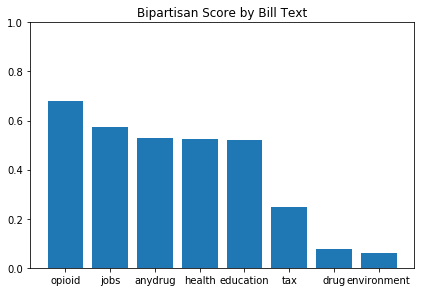

In [22]:
#Create bar chart by sorted dataframe, showing bipartisan score by keyword
BipartisanScore = pd.DataFrame(list(zip(terms, score)))
BipartisanScore = BipartisanScore.sort_values(by = 1, ascending=False)
plt.bar(BipartisanScore[0], BipartisanScore[1])
plt.ylim(0,1)
plt.tight_layout()
plt.title("Bipartisan Score by Bill Text")
plt.savefig('../uwi/data/Bi_PartisanScore_By_Keyword.png')

In [23]:
#Get voting data on opiod related votes

#Narrow down data set by opioid == True
opioid = vote_data[vote_data['opioid']]
opioidgroup = opioid.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
opioidgroup['PercentYes - Opioid'] = opioidgroup['Yes'] / (opioidgroup['Yes'] + opioidgroup['No'])
opioidgroup = opioidgroup.drop('No', 1)
opioidgroup = opioidgroup.drop('Yes', 1)
opioidgroup.head()



,PercentYes - Opioid
member_id,
A000055,0.875
A000367,0.125
A000369,0.875
A000370,0.750
A000371,0.750


In [24]:
#Get voting data on any drug related votes

#Narrow down data set by anydrug == True
drug = vote_data[vote_data['anydrug']]
druggroup = drug.groupby('member_id').agg({'Yes' : 'sum', 'No': 'sum'})
druggroup['PercentYes - AnyDrug'] = druggroup['Yes'] / (druggroup['Yes'] + druggroup['No'])
druggroup = druggroup.drop('No', 1)
druggroup = druggroup.drop('Yes', 1)
druggroup.head()

,PercentYes - AnyDrug
member_id,
A000055,0.909091
A000367,0.363636
A000369,0.909091
A000370,0.545455
A000371,0.545455


In [25]:
#Merge two data sets together

vote_summary = pd.merge(opioidgroup, druggroup, on = "member_id", how = 'outer')
vote_summary.index.names = ['id']

vote_summary.head()

,PercentYes - Opioid,PercentYes - AnyDrug
id,,
A000055,0.875,0.909091
A000367,0.125,0.363636
A000369,0.875,0.909091
A000370,0.750,0.545455
A000371,0.750,0.545455


In [28]:
#Merge this data back to member summary data

all_members_votes = pd.merge(reps_short_list, vote_summary, on = 'id', how = 'outer')
all_members_votes.head()

,Unnamed: 0,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,missed_votes_pct,votes_with_party_pct,State_Disct,PercentYes - Opioid,PercentYes - AnyDrug
0,0,A000374,Ralph,Abraham,R,5,LA,1147.0,8.0,4,0.70,96.93,LA-5,0.875,0.909091
1,1,A000370,Alma,Adams,D,12,NC,1147.0,32.0,6,2.79,95.70,NC-12,0.750,0.545455
2,2,A000055,Robert,Aderholt,R,4,AL,1147.0,48.0,22,4.18,96.82,AL-4,0.875,0.909091
3,3,A000371,Pete,Aguilar,D,31,CA,1147.0,14.0,4,1.22,92.06,CA-31,0.750,0.545455
4,4,A000372,Rick,Allen,R,12,GA,1147.0,12.0,4,1.05,97.80,GA-12,0.875,0.909091


In [30]:
#Get Average 'yes' votes by state
yes_votes = all_members_votes.groupby('state').agg({'PercentYes - AnyDrug' : 'mean'})
yes_votes.head()

,PercentYes - AnyDrug
state,
AK,NaN
AL,0.811688
AR,0.909091
AS,NaN
AZ,0.718409


In [32]:
#Aggregate drug data based on state and year

state_death_rate = state_data[state_data['INDICATOR']== 'drugdeathrate']
state_death_rate = state_death_rate[state_death_rate['YEAR'] == 2016]
state_death_rate['state'] = state_death_rate['STATEABBREVIATION']
state_death_rate.head()

,Unnamed: 0,STATEFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,state
8652,8652,1,2016,drugdeathrate,15.5,Alabama,AL,AL
8666,8666,2,2016,drugdeathrate,17.3,Alaska,AK,AK
8680,8680,4,2016,drugdeathrate,19.9,Arizona,AZ,AZ
8694,8694,5,2016,drugdeathrate,13.4,Arkansas,AR,AR
8708,8708,6,2016,drugdeathrate,11.9,California,CA,CA


In [36]:
#Merge drug death data with 'Yes' votes

deaths_to_yes = pd.merge(yes_votes, state_death_rate, on = 'state', how = 'inner')
deaths_to_yes = deaths_to_yes[['PercentYes - AnyDrug', 'VALUE', 'state']]
deaths_to_yes.head()

,PercentYes - AnyDrug,VALUE,state
0,NaN,17.3,AK
1,0.811688,15.5,AL
2,0.909091,13.4,AR
3,0.718409,19.9,AZ
4,0.622045,11.9,CA


/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


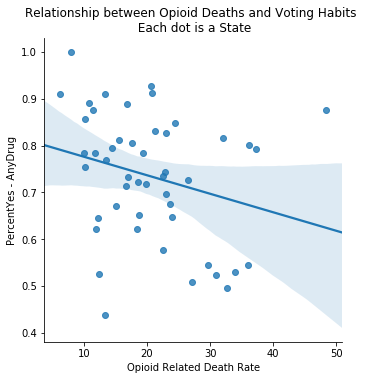

In [42]:
sns.lmplot(x = 'VALUE', y = 'PercentYes - AnyDrug', data = deaths_to_yes)
plt.xlabel('Opioid Related Death Rate')
plt.title('Relationship between Opioid Deaths and Voting Habits \n Each dot is a State')
plt.savefig("../uwi/data/Deaths_by_State_Votes.png")

In [44]:
dist_death_rate = district_data[district_data['INDICATOR']== 'drugdeathrate']
dist_death_rate = dist_death_rate[dist_death_rate['YEAR'] == 2016]
dist_death_rate['DISTRICT_Str'] = dist_death_rate['DISTRICT'].astype(str)
dist_death_rate['State_Disct'] = dist_death_rate['STATEABBREVIATION'] + '-' + dist_death_rate['DISTRICT_Str']
dist_death_rate.head()

,Unnamed: 0,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,DISTRICT_Str,State_Disct
79833,79833,1,1,2016,drugdeathrate,12.7,Alabama,AL,1,AL-1
79847,79847,1,2,2016,drugdeathrate,0.3,Alabama,AL,2,AL-2
79861,79861,1,3,2016,drugdeathrate,6.8,Alabama,AL,3,AL-3
79875,79875,1,4,2016,drugdeathrate,11.7,Alabama,AL,4,AL-4
79889,79889,1,5,2016,drugdeathrate,11.5,Alabama,AL,5,AL-5


In [45]:
FinalData = pd.merge(all_members_votes,dist_death_rate, on = 'State_Disct')
FinalData.head()

,Unnamed: 0_x,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,...,PercentYes - AnyDrug,Unnamed: 0_y,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,DISTRICT_Str
0,0,A000374,Ralph,Abraham,R,5,LA,1147.0,8.0,4,...,0.909091,82325,22,5,2016,drugdeathrate,12.8,Louisiana,LA,5
1,1,A000370,Alma,Adams,D,12,NC,1147.0,32.0,6,...,0.545455,83977,37,12,2016,drugdeathrate,16.1,North Carolina,NC,12
2,2,A000055,Robert,Aderholt,R,4,AL,1147.0,48.0,22,...,0.909091,79875,1,4,2016,drugdeathrate,11.7,Alabama,AL,4
3,3,A000371,Pete,Aguilar,D,31,CA,1147.0,14.0,4,...,0.545455,80547,6,31,2016,drugdeathrate,4.4,California,CA,31
4,4,A000372,Rick,Allen,R,12,GA,1147.0,12.0,4,...,0.909091,81597,13,12,2016,drugdeathrate,6.6,Georgia,GA,12


In [91]:
FinalData['quantile'] = pd.qcut(FinalData['VALUE'], 4, labels=False)
FinalData.head()

,Unnamed: 0_x,id,first_name,last_name,party,district,state,total_votes,missed_votes,seniority,...,Unnamed: 0_y,STATEFP,DISTRICT,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,DISTRICT_Str,quantile
0,0,A000374,Ralph,Abraham,R,5,LA,1147.0,8.0,4,...,82325,22,5,2016,drugdeathrate,12.8,Louisiana,LA,5,1.0
1,1,A000370,Alma,Adams,D,12,NC,1147.0,32.0,6,...,83977,37,12,2016,drugdeathrate,16.1,North Carolina,NC,12,1.0
2,2,A000055,Robert,Aderholt,R,4,AL,1147.0,48.0,22,...,79875,1,4,2016,drugdeathrate,11.7,Alabama,AL,4,1.0
3,3,A000371,Pete,Aguilar,D,31,CA,1147.0,14.0,4,...,80547,6,31,2016,drugdeathrate,4.4,California,CA,31,0.0
4,4,A000372,Rick,Allen,R,12,GA,1147.0,12.0,4,...,81597,13,12,2016,drugdeathrate,6.6,Georgia,GA,12,0.0


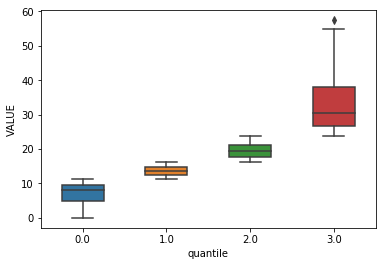

In [92]:
bplot = sns.boxplot(y='VALUE', x='quantile', 
                 data=FinalData, 
                 width=0.5)

In [93]:
census_data.head()
FIPs = pd.read_csv("../uwi/data/FIPS.csv")
FIPs.head()
census_total.columns

Index(['population', 'mAgeTotal', 'mAgeM', 'mAgeF', 'state', 'cDistrict',
       'schoolTotal', 'No Schooling', 'Nursery', 'Kinder', '1st', '2nd', '3rd',
       '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th nod',
       '12th d', 'GEDalt', 'colUnder1yr', 'colOver1yr', 'Associates',
       'Bachelors', 'Masters', 'ProfSchool', 'Doctorate', 'piTotal',
       'psUTotal', 'psUM', 'psUF', 'psOTotal', 'psOM', 'psOF', 'eTotal', 'woE',
       'withE', 'wTotal', 'woW', 'withW', 'healthTotal', 'healthM', 'healthF',
       'StateName', 'Abbrev', 'State_Disct'],
      dtype='object')

In [94]:
census_data.head()
census_total = pd.merge(census_data, FIPs, on = 'state', how = 'left')
census_total['State_Disct'] = census_total['Abbrev'] + '-' + census_total['cDistrict'].astype(str)
census_total.head()

,population,mAgeTotal,mAgeM,mAgeF,state,cDistrict,schoolTotal,No Schooling,Nursery,Kinder,...,withE,wTotal,woW,withW,healthTotal,healthM,healthF,StateName,Abbrev,State_Disct
0,704457,39.6,38.3,41.0,1,1,483628,6173,0,89,...,77638,264399,179447,84952,691182,327312,363870,Alabama,AL,AL-1
1,681621,38.2,36.7,40.1,1,2,464210,5620,0,0,...,74702,259766,177866,81900,661346,315970,345376,Alabama,AL,AL-2
2,709482,38.3,36.6,39.8,1,3,472077,7650,0,0,...,72792,270850,191269,79581,696843,335042,361801,Alabama,AL,AL-3
3,683273,40.7,39.7,42.0,1,4,472340,11335,137,31,...,85095,256036,163476,92560,677025,330956,346069,Alabama,AL,AL-4
4,712529,40.1,38.4,41.8,1,5,490229,6742,76,153,...,71604,278329,199528,78801,701156,342268,358888,Alabama,AL,AL-5


In [95]:
census_votes = pd.merge(census_total, FinalData, on = 'State_Disct')
census_votes.head()
census_votes.columns

Index(['population', 'mAgeTotal', 'mAgeM', 'mAgeF', 'state_x', 'cDistrict',
       'schoolTotal', 'No Schooling', 'Nursery', 'Kinder', '1st', '2nd', '3rd',
       '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th nod',
       '12th d', 'GEDalt', 'colUnder1yr', 'colOver1yr', 'Associates',
       'Bachelors', 'Masters', 'ProfSchool', 'Doctorate', 'piTotal',
       'psUTotal', 'psUM', 'psUF', 'psOTotal', 'psOM', 'psOF', 'eTotal', 'woE',
       'withE', 'wTotal', 'woW', 'withW', 'healthTotal', 'healthM', 'healthF',
       'StateName', 'Abbrev', 'State_Disct', 'Unnamed: 0_x', 'id',
       'first_name', 'last_name', 'party', 'district', 'state_y',
       'total_votes', 'missed_votes', 'seniority', 'missed_votes_pct',
       'votes_with_party_pct', 'PercentYes - Opioid', 'PercentYes - AnyDrug',
       'Unnamed: 0_y', 'STATEFP', 'DISTRICT', 'YEAR', 'INDICATOR', 'VALUE',
       'STATE', 'STATEABBREVIATION', 'DISTRICT_Str', 'quantile'],
      dtype='object')

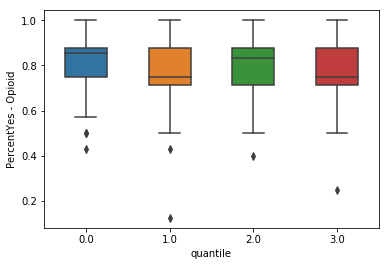

In [101]:
bplot = sns.boxplot(y='PercentYes - Opioid', x='quantile', 
                 data=census_votes, 
                 width=0.5)

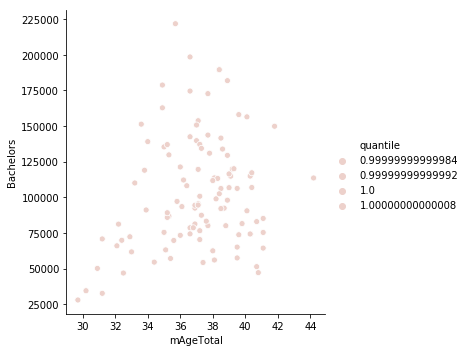

In [108]:
sns.relplot(x = 'mAgeTotal', y = 'Bachelors', hue = 'quantile', data = census_votes[census_votes['quantile'] == 1])
